# Data Cleaning/Pre-Processing

In [1]:
#imports
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import IPython

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

C:\Users\duiba\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Part 1: IMDB

In [2]:
# load imdb dataset
IMDB_path = "IMDB-Movie-Data.csv"
IMDB_dataset = pd.read_csv(IMDB_path)

IMDB_dataset

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [3]:
# drop irrevalent columns
IMDB_dataset.drop(axis=1, labels=['Rank','Description'], inplace=True)

# rename the columns
IMDB_dataset.columns = ['title','genre','director','actors','year','duration','rate','votes','revenue','meta']

# drop the rows whose meta score is null
IMDB_dataset.dropna(inplace=True,subset=['meta'])

# reset the row index
IMDB_dataset.reset_index(drop=True,inplace=True)

# scale the rate column up by a factor of 10
IMDB_dataset['rate'] = IMDB_dataset['rate'] * 10

IMDB_dataset

,title,genre,director,actors,year,duration,rate,votes,revenue,meta
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,81.0,757074,333.13,76.0
1,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,70.0,485820,126.46,65.0
2,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,73.0,157606,138.12,62.0
3,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,72.0,60545,270.32,59.0
4,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,62.0,393727,325.02,40.0
5,The Great Wall,"Action,Adventure,Fantasy",Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,61.0,56036,45.13,42.0
6,La La Land,"Comedy,Drama,Music",Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,83.0,258682,151.06,93.0
7,Mindhorn,Comedy,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,64.0,2490,NaN,71.0
8,The Lost City of Z,"Action,Adventure,Biography",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,71.0,7188,8.01,78.0
9,Passengers,"Adventure,Drama,Romance",Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,70.0,192177,100.01,41.0


In [4]:
# function that strip the white space of the string
def strip(name) :
    return str(name).strip()

In [5]:
# function that turn string to lower case
def lower(name):
    return str(name).lower()

In [6]:
# Strip the leading and ending white space in title column
IMDB_dataset["title"] = IMDB_dataset["title"].apply(strip)

# Transform the title column into all lower case
IMDB_dataset["title"] = IMDB_dataset["title"].apply(lower)

IMDB_dataset

,title,genre,director,actors,year,duration,rate,votes,revenue,meta
0,guardians of the galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,81.0,757074,333.13,76.0
1,prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,70.0,485820,126.46,65.0
2,split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,73.0,157606,138.12,62.0
3,sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,72.0,60545,270.32,59.0
4,suicide squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,62.0,393727,325.02,40.0
5,the great wall,"Action,Adventure,Fantasy",Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,61.0,56036,45.13,42.0
6,la la land,"Comedy,Drama,Music",Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,83.0,258682,151.06,93.0
7,mindhorn,Comedy,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,64.0,2490,NaN,71.0
8,the lost city of z,"Action,Adventure,Biography",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,71.0,7188,8.01,78.0
9,passengers,"Adventure,Drama,Romance",Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,70.0,192177,100.01,41.0


In [7]:
# store the number of rows that meta score is null
#num_rows_to_drop = IMDB_dataset[IMDB_dataset['meta'].isnull()]['year'].value_counts()

# get a sense whether we should drop the rows directly or not.
#print(num_rows_to_drop)
#print(IMDB_dataset['year'].value_counts())

### Part 2: Oscar

In [8]:
# load the Oscars dataframe
Oscars_path = "database.csv"
Oscars_dataset = pd.read_csv(Oscars_path)

Oscars_dataset

,Year,Ceremony,Award,Winner,Name,Film
0,1927/1928,1,Actor,NaN,Richard Barthelmess,The Noose
1,1927/1928,1,Actor,1.0,Emil Jannings,The Last Command
2,1927/1928,1,Actress,NaN,Louise Dresser,A Ship Comes In
3,1927/1928,1,Actress,1.0,Janet Gaynor,7th Heaven
4,1927/1928,1,Actress,NaN,Gloria Swanson,Sadie Thompson
5,1927/1928,1,Art Direction,NaN,Rochus Gliese,Sunrise
6,1927/1928,1,Art Direction,1.0,William Cameron Menzies,The Dove; Tempest
7,1927/1928,1,Art Direction,NaN,Harry Oliver,7th Heaven
8,1927/1928,1,Cinematography,NaN,George Barnes,The Devil Dancer; The Magic Flame; Sadie Thompson
9,1927/1928,1,Cinematography,1.0,Charles Rosher,Sunrise


In [9]:
# rename the columns
Oscars_dataset.columns = ['year','ceremony','award','winner','name','film']

# replace NaN in winner columns with 0, denoting that this nominee did not win the award
Oscars_dataset.fillna({'winner': 0},inplace=True)

# drop rows that represent awards prior to year of 2006
Oscars_dataset = Oscars_dataset[Oscars_dataset['ceremony'].astype(int) > 78]

# reset the rows index
Oscars_dataset.reset_index(drop=True,inplace=True)

Oscars_dataset

,year,ceremony,award,winner,name,film
0,2006,79,Actor in a Leading Role,0.0,Leonardo DiCaprio,Blood Diamond
1,2006,79,Actor in a Leading Role,0.0,Ryan Gosling,Half Nelson
2,2006,79,Actor in a Leading Role,0.0,Peter O'Toole,Venus
3,2006,79,Actor in a Leading Role,0.0,Will Smith,The Pursuit of Happyness
4,2006,79,Actor in a Leading Role,1.0,Forest Whitaker,The Last King of Scotland
5,2006,79,Actor in a Supporting Role,1.0,Alan Arkin,Little Miss Sunshine
6,2006,79,Actor in a Supporting Role,0.0,Jackie Earle Haley,Little Children
7,2006,79,Actor in a Supporting Role,0.0,Djimon Hounsou,Blood Diamond
8,2006,79,Actor in a Supporting Role,0.0,Eddie Murphy,Dreamgirls
9,2006,79,Actor in a Supporting Role,0.0,Mark Wahlberg,The Departed


In [10]:
# strip the leading and ending white space of name and film column
Oscars_dataset["name"] = Oscars_dataset["name"].apply(strip)
Oscars_dataset["film"] = Oscars_dataset["film"].apply(strip)

# transform the name and film columns to all lower case
Oscars_dataset["name"] = Oscars_dataset["name"].apply(lower)
Oscars_dataset["film"] = Oscars_dataset["film"].apply(lower)

Oscars_dataset

C:\Users\duiba\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\duiba\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\duiba\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,year,ceremony,award,winner,name,film
0,2006,79,Actor in a Leading Role,0.0,leonardo dicaprio,blood diamond
1,2006,79,Actor in a Leading Role,0.0,ryan gosling,half nelson
2,2006,79,Actor in a Leading Role,0.0,peter o'toole,venus
3,2006,79,Actor in a Leading Role,0.0,will smith,the pursuit of happyness
4,2006,79,Actor in a Leading Role,1.0,forest whitaker,the last king of scotland
5,2006,79,Actor in a Supporting Role,1.0,alan arkin,little miss sunshine
6,2006,79,Actor in a Supporting Role,0.0,jackie earle haley,little children
7,2006,79,Actor in a Supporting Role,0.0,djimon hounsou,blood diamond
8,2006,79,Actor in a Supporting Role,0.0,eddie murphy,dreamgirls
9,2006,79,Actor in a Supporting Role,0.0,mark wahlberg,the departed


In [11]:
# combine the two dataframe to generate a new dataframe composed of all Oscar winners
Oscar_all_winner = pd.DataFrame({})
o1 = Oscars_dataset[Oscars_dataset['winner'] == 1]

for name, film in zip(o1["name"], o1["film"]):
    Oscar_all_winner = Oscar_all_winner.append(IMDB_dataset[IMDB_dataset["title"] == name])
    Oscar_all_winner = Oscar_all_winner.append(IMDB_dataset[IMDB_dataset["title"] == film])

Oscar_all_winner.drop_duplicates(inplace=True)
Oscar_all_winner.reset_index(drop=True, inplace=True)
Oscar_all_winner

,title,genre,director,actors,year,duration,rate,votes,revenue,meta
0,little miss sunshine,"Comedy,Drama",Jonathan Dayton,"Steve Carell, Toni Collette, Greg Kinnear, Abi...",2006,101,78.0,374044,59.89,80.0
1,happy feet,"Animation,Comedy,Family",George Miller,"Elijah Wood, Brittany Murphy, Hugh Jackman, Ro...",2006,108,65.0,141141,197.99,77.0
2,pan's labyrinth,"Drama,Fantasy,War",Guillermo del Toro,"Ivana Baquero, Ariadna Gil, Sergi López,Maribe...",2006,118,82.0,498879,37.62,98.0
3,marie antoinette,"Biography,Drama,History",Sofia Coppola,"Kirsten Dunst, Jason Schwartzman, Rip Torn, Ju...",2006,123,64.0,83941,15.96,65.0
4,the departed,"Crime,Drama,Thriller",Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,85.0,937414,132.37,85.0
5,the lives of others,"Drama,Thriller",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,85.0,278103,11.28,89.0
6,babel,Drama,Alejandro González Iñárritu,"Brad Pitt, Cate Blanchett, Gael García Bernal,...",2006,143,75.0,253417,34.30,69.0
7,pirates of the caribbean: dead man's chest,"Action,Adventure,Fantasy",Gore Verbinski,"Johnny Depp, Orlando Bloom, Keira Knightley, J...",2006,151,73.0,552027,423.03,53.0
8,there will be blood,"Drama,History",Paul Thomas Anderson,"Daniel Day-Lewis, Paul Dano, Ciarán Hinds,Mart...",2007,158,81.0,400682,40.22,92.0
9,no country for old men,"Crime,Drama,Thriller",Ethan Coen,"Tommy Lee Jones, Javier Bardem, Josh Brolin, W...",2007,122,81.0,660286,74.27,91.0


In [12]:
# combine the two dataframes to generate a new dataframe composed of all Oscar nominees
Oscar_nominated = pd.DataFrame({})
for name, film in zip(Oscars_dataset["name"], Oscars_dataset["film"]):
    Oscar_nominated = Oscar_nominated.append(IMDB_dataset[IMDB_dataset["title"] == name])
    Oscar_nominated = Oscar_nominated.append(IMDB_dataset[IMDB_dataset["title"] == film])
Oscar_nominated.drop_duplicates(inplace=True)
Oscar_nominated.reset_index(drop=True, inplace=True)
Oscar_nominated

,title,genre,director,actors,year,duration,rate,votes,revenue,meta
0,blood diamond,"Adventure,Drama,Thriller",Edward Zwick,"Leonardo DiCaprio, Djimon Hounsou, Jennifer Co...",2006,143,80.0,422014,57.37,64.0
1,the pursuit of happyness,"Biography,Drama",Gabriele Muccino,"Will Smith, Thandie Newton, Jaden Smith, Brian...",2006,117,80.0,361105,162.59,64.0
2,little miss sunshine,"Comedy,Drama",Jonathan Dayton,"Steve Carell, Toni Collette, Greg Kinnear, Abi...",2006,101,78.0,374044,59.89,80.0
3,the departed,"Crime,Drama,Thriller",Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,85.0,937414,132.37,85.0
4,the devil wears prada,"Comedy,Drama",David Frankel,"Anne Hathaway, Meryl Streep, Adrian Grenier, E...",2006,109,68.0,302268,124.73,62.0
5,babel,Drama,Alejandro González Iñárritu,"Brad Pitt, Cate Blanchett, Gael García Bernal,...",2006,143,75.0,253417,34.30,69.0
6,cars,"Animation,Adventure,Comedy",John Lasseter,"Owen Wilson, Bonnie Hunt, Paul Newman, Larry t...",2006,117,71.0,283445,244.05,73.0
7,happy feet,"Animation,Comedy,Family",George Miller,"Elijah Wood, Brittany Murphy, Hugh Jackman, Ro...",2006,108,65.0,141141,197.99,77.0
8,pan's labyrinth,"Drama,Fantasy,War",Guillermo del Toro,"Ivana Baquero, Ariadna Gil, Sergi López,Maribe...",2006,118,82.0,498879,37.62,98.0
9,pirates of the caribbean: dead man's chest,"Action,Adventure,Fantasy",Gore Verbinski,"Johnny Depp, Orlando Bloom, Keira Knightley, J...",2006,151,73.0,552027,423.03,53.0


In [13]:
# combine the two dataframes to generate a new dataframe composed of all movies that are not nominated
non_nominee = IMDB_dataset
for name in Oscar_nominated['title']:
    non_nominee = non_nominee[non_nominee['title'] != name]
non_nominee.reset_index(drop=True,inplace=True)
non_nominee

,title,genre,director,actors,year,duration,rate,votes,revenue,meta
0,split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,73.0,157606,138.12,62.0
1,sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,72.0,60545,270.32,59.0
2,suicide squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,62.0,393727,325.02,40.0
3,the great wall,"Action,Adventure,Fantasy",Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,61.0,56036,45.13,42.0
4,la la land,"Comedy,Drama,Music",Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,83.0,258682,151.06,93.0
5,mindhorn,Comedy,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,64.0,2490,NaN,71.0
6,the lost city of z,"Action,Adventure,Biography",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,71.0,7188,8.01,78.0
7,passengers,"Adventure,Drama,Romance",Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,70.0,192177,100.01,41.0
8,fantastic beasts and where to find them,"Adventure,Family,Fantasy",David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,75.0,232072,234.02,66.0
9,hidden figures,"Biography,Drama,History",Theodore Melfi,"Taraji P. Henson, Octavia Spencer, Janelle Mon...",2016,127,78.0,93103,169.27,74.0


# Part II: Data Visualization

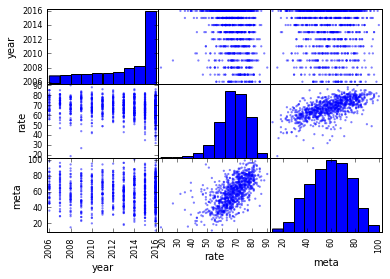

In [14]:
# for IMDB
fd = pd.plotting.scatter_matrix(IMDB_dataset[['year', 'rate', 'meta']])

In [26]:
# Basic statistics
rate_stats = IMDB_dataset['rate'].describe()
meta_stats = IMDB_dataset['meta'].describe()
print("------------IMDB Rate----------\n", rate_stats)
print("------------IMDB Meta -----------\n", meta_stats)

------------IMDB Rate----------
 count    936.000000
mean      67.291667
std        9.352250
min       19.000000
25%       62.000000
50%       68.000000
75%       74.000000
max       90.000000
Name: rate, dtype: float64
------------IMDB Meta -----------
 count    936.000000
mean      58.985043
std       17.194757
min       11.000000
25%       47.000000
50%       59.500000
75%       72.000000
max      100.000000
Name: meta, dtype: float64


(0, 125)

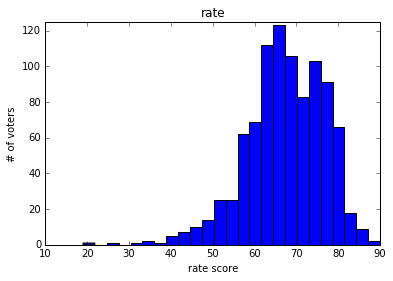

In [29]:
_ = plt.hist(IMDB_dataset['rate'],25)
plt.title("Rate Graph")
plt.xlabel("rate score")
plt.ylabel("# of movies")

f1 = plt.gca()
f1.set_ylim([0,125])

(0, 125)

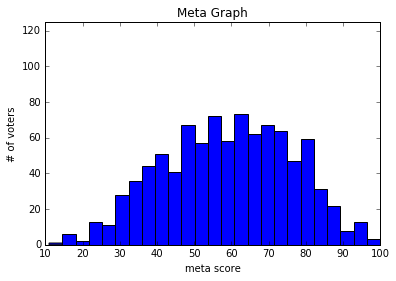

In [31]:
_ = plt.hist(IMDB_dataset['meta'],25)
plt.title("Meta Graph")
plt.xlabel("meta score")
plt.ylabel("# of movies")

f2 = plt.gca()
f2.set_ylim([0,125])

(0, 1000)

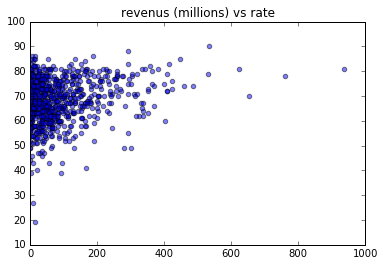

In [39]:
plt.scatter(IMDB_dataset['revenue'], IMDB_dataset['rate'], alpha=0.5)
plt.title("revenus (millions) vs rate")
f1 = plt.gca()
f1.set_xlim([0,1000])

(0, 1000)

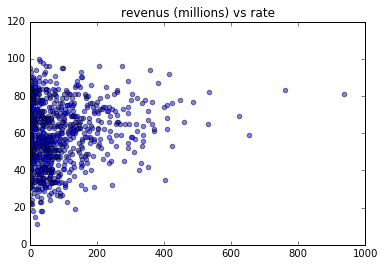

In [51]:
plt.scatter(IMDB_dataset['revenue'], IMDB_dataset['meta'], alpha=0.5)
plt.title("revenus (millions) vs rate")
f1 = plt.gca()
f1.set_xlim([0,1000])

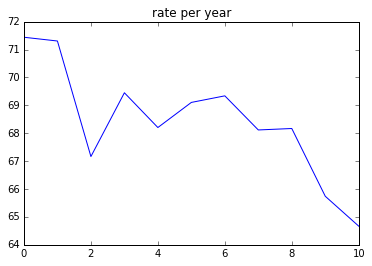

In [48]:
def rateMeanPerYear(colName):
    a = []
    for year in range(2006,2017):
        a.append(IMDB_dataset.loc[IMDB_dataset['year'] == year][colName].mean())
    return a

plt.plot(rateMeanPerYear('rate'))
plt.title("rate per year") 
f1 = plt.gca()


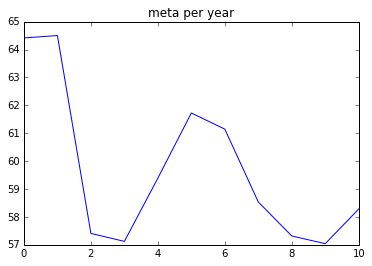

In [49]:
plt.plot(rateMeanPerYear('meta'))
plt.title("meta per year") 
f1 = plt.gca()

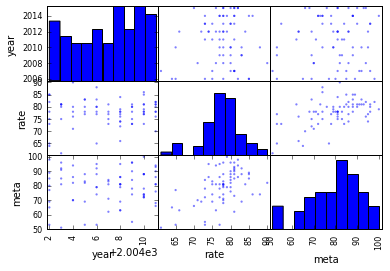

In [53]:
# for Oscar Winners

fd = pd.plotting.scatter_matrix(Oscar_all_winner[['year', 'rate', 'meta']])


In [54]:
# Basic statistics
rate_stats = Oscar_all_winner['rate'].describe()
meta_stats = Oscar_all_winner['meta'].describe()
print("------------Oscar_all_winner Rate----------\n", rate_stats)
print("------------Oscar_all_winner Meta -----------\n", meta_stats)

------------Oscar_all_winner Rate----------
 count    72.000000
mean     77.750000
std       5.375348
min      61.000000
25%      75.000000
50%      78.000000
75%      81.000000
max      90.000000
Name: rate, dtype: float64
------------Oscar_all_winner Meta -----------
 count     72.000000
mean      79.569444
std       11.796187
min       51.000000
25%       72.000000
50%       81.000000
75%       88.000000
max      100.000000
Name: meta, dtype: float64


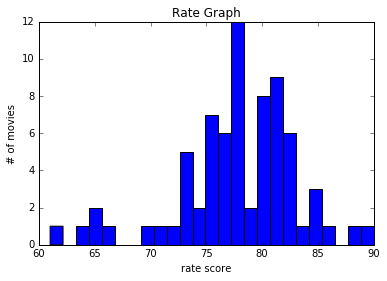

In [57]:
_ = plt.hist(Oscar_all_winner['rate'],25)
plt.title("Rate Graph")
plt.xlabel("rate score")
plt.ylabel("# of movies")

f1 = plt.gca()

(0, 12)

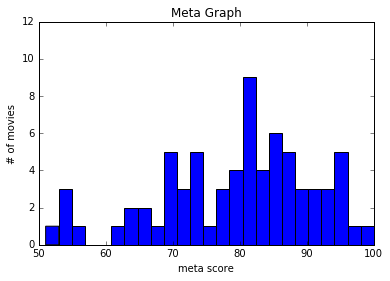

In [59]:
_ = plt.hist(Oscar_all_winner['meta'],25)
plt.title("Meta Graph")
plt.xlabel("meta score")
plt.ylabel("# of movies")

f2 = plt.gca()
f2.set_ylim([0,12])

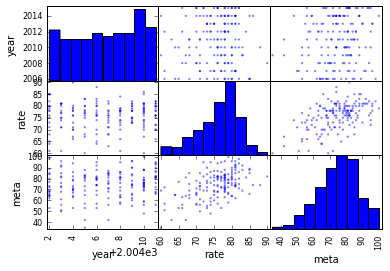

In [60]:
# for Oscar_nominated
fd = pd.plotting.scatter_matrix(Oscar_nominated[['year', 'rate', 'meta']])

In [ ]:
# Basic statistics
rate_stats = Oscar_all_winner['rate'].describe()
meta_stats = Oscar_all_winner['meta'].describe()
print("------------Oscar_all_winner Rate----------\n", rate_stats)
print("------------Oscar_all_winner Meta -----------\n", meta_stats)

In [ ]:
_ = plt.hist(Oscar_all_winner['rate'],25)
plt.title("Rate Graph")
plt.xlabel("rate score")
plt.ylabel("# of movies")

f1 = plt.gca()

In [ ]:
_ = plt.hist(Oscar_all_winner['meta'],25)
plt.title("Meta Graph")
plt.xlabel("meta score")
plt.ylabel("# of movies")

f2 = plt.gca()
f2.set_ylim([0,12])

# Part III: Data Analysis and Results

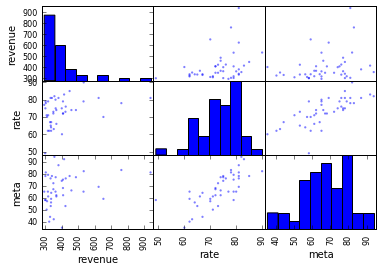

In [18]:
avg_rev = IMDB_dataset['revenue'].mean()
std_rev = IMDB_dataset['revenue'].std()

high_rev = avg_rev + 2*std_rev

high_rev_df = IMDB_dataset.loc[IMDB_dataset['revenue'] >= high_rev] 
high_rev_df.reset_index(drop=True,inplace=True)


rate = high_rev_df['rate'].describe()
meta = high_rev_df['meta'].describe()

# print(meta)

fd = pd.plotting.scatter_matrix(high_rev_df[['revenue', 'rate', 'meta']])

In [19]:
popular_genre_dict = dict()

for index, row in IMDB_dataset.iterrows():
    genre_list = row["genre"].split(',')
    for genre in genre_list:
        if genre not in popular_genre_dict:
            if not np.isnan(row["revenue"]):
                popular_genre_dict[genre] = (1,row["meta"], row["revenue"])
            else:
                popular_genre_dict[genre] = (1,row["meta"], 0.0)
        else:
            value = popular_genre_dict[genre]
            if not np.isnan(row["revenue"]):
                popular_genre_dict[genre] = (value[0]+1, value[1]+row["meta"], value[2]+row["revenue"])
            else: 
                popular_genre_dict[genre] = (value[0]+1, value[1]+row["meta"], value[2])
                
for k, v in list(popular_genre_dict.items()):
    newtuple = (v[0], v[1]/v[0], v[2]/v[0])
    popular_genre_dict[k] = newtuple
    if v[0] <= 100:
        del popular_genre_dict[k]
popular_genre = list(popular_genre_dict.items())
print(popular_genre)

[('Action', (289, 53.83044982698962, 121.81283737024225)), ('Romance', (131, 55.458015267175576, 39.341297709923666)), ('Horror', (108, 56.68518518518518, 30.133333333333333)), ('Crime', (141, 57.787234042553195, 56.90113475177305)), ('Drama', (474, 63.49789029535865, 44.83831223628693)), ('Sci-Fi', (114, 58.228070175438596, 129.01464912280701)), ('Comedy', (268, 57.6044776119403, 71.78406716417912)), ('Adventure', (249, 57.670682730923694, 154.00421686746998)), ('Thriller', (183, 58.677595628415304, 57.218032786885246))]


In [20]:
outcome_1, predictors_1 = patsy.dmatrices('meta ~ rate + revenue + duration + votes', IMDB_dataset)
mod_all = sm.OLS(outcome_1, predictors_1)
res_all = mod_all.fit()
print(res_all.summary())

                            OLS Regression Results                            
Dep. Variable:                   meta   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     173.1
Date:                Thu, 15 Mar 2018   Prob (F-statistic):          7.14e-108
Time:                        16:40:21   Log-Likelihood:                -3307.0
No. Observations:                 838   AIC:                             6624.
Df Residuals:                     833   BIC:                             6648.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.0115      4.273     -6.556      0.0

In [21]:
outcome_2, predictors_2 = patsy.dmatrices('meta ~ rate + revenue + duration + votes', Oscar_nominated)
mod_nominated = sm.OLS(outcome_2, predictors_2)
res_nominated = mod_nominated.fit()
print(res_nominated.summary())

                            OLS Regression Results                            
Dep. Variable:                   meta   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     21.81
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           2.31e-14
Time:                        16:40:21   Log-Likelihood:                -607.38
No. Observations:                 164   AIC:                             1225.
Df Residuals:                     159   BIC:                             1240.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6559     14.576      0.114      0.9